# Question 1 

In [1]:
import requests 
from bs4 import BeautifulSoup
import selenium

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/Main_Page')
page.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YAZBsgpAMMQAA1GYviYAAAAQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Main_Page","wgTitle":"Main Page","wgCurRevisionId":987965326,"wgRevisionId":987965326,"wgArticleId":15580374,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Main_Page","wgRelevantArticleId":15580374,"wgIsProbablyEditable":!1,"wgRelevantPageIsProba

In [3]:
soup = BeautifulSoup(page.content,'html.parser')

In [4]:
#Creating an empty list to store the header
header = []

In [5]:
#Let's write a code to get the header of the webpage
head = soup.find_all('span',class_='mw-headline')
head[0:4]

[<span class="mw-headline" id="From_today's_featured_article">From today's featured article</span>,
 <span class="mw-headline" id="Did_you_know_...">Did you know ...</span>,
 <span class="mw-headline" id="In_the_news">In the news</span>,
 <span class="mw-headline" id="On_this_day">On this day</span>]

In [6]:
for i in head:
    header.append(i.get_text())
    
header[0:4]

["From today's featured article",
 'Did you know\xa0...',
 'In the news',
 'On this day']

In [7]:
#One of the header seems to have some abnormality so we will remove it first before creating a dataframe
new_header = []
for i in header:
    a = i.replace('\xa0...','')
    new_header.append(a)

In [8]:
import pandas as pd
df_header = pd.DataFrame({})
df_header['Header'] = new_header
df_header['S.No'] = list(range(1,len(new_header)+1))
df_header.set_index('S.No')

,Header
S.No,
1,From today's featured article
2,Did you know
3,In the news
4,On this day
5,Today's featured picture
6,Other areas of Wikipedia
7,Wikipedia's sister projects
8,Wikipedia languages


In [9]:
df_header.to_csv('Question_1.csv')

# Question 2 

In [10]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [11]:
page = requests.get("https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc")

In [12]:
page.content

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb &quot;Top 100&quot;\n(Sorted by IMDb Rating Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\

In [13]:
#creating empty lists of new required fields
name = []
ratings = []
release_year = []
rank = []

In [14]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')

In [15]:
#Getting the required data from the parsed data
def find_all_soup(tag,para,cls,lst_name):
    head = soup.find_all(tag,para=cls)
    for i in head:
        lst_name.append(i.get_text().replace('\n',''))

In [16]:
#Now we will use the fuction to get the data
#---1 Release Year
year = soup.find_all('span',class_='lister-item-year text-muted unbold')
for i in year:
    release_year.append(i.get_text().replace('\n',''))
release_year[:10]

['(1994)',
 '(1972)',
 '(2008)',
 '(1974)',
 '(1957)',
 '(2003)',
 '(1994)',
 '(1993)',
 '(2010)',
 '(1999)']

In [17]:
#---2 Ratings

movies = soup.find_all('div',class_='lister-item mode-advanced')
movies

for i in range(0,len(movies)):
    movie = movies[i]
    ratings.append(movie.strong.get_text())
    
ratings[:10]

['9.3', '9.2', '9.0', '9.0', '9.0', '8.9', '8.9', '8.9', '8.8', '8.8']

In [18]:
#---3 Name
for i in range(0,(len(movies))):
    movie = movies[i]
    name.append(movie.h3.a.get_text())

name[:10]

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 "Schindler's List",
 'Inception',
 'Fight Club']

In [19]:
#---4 Rank
rnk = soup.find_all('span',class_='lister-item-index unbold text-primary')
for i in rnk:
    rank.append(i.get_text())
    
rank[:10]

['1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.']

In [20]:
#Now let's get data for the next 50 movies on the other URL
page2 = requests.get('https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&start=51&ref_=adv_nxt')

In [21]:
page2.content

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb &quot;Top 100&quot;\n(Sorted by IMDb Rating Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\

In [22]:
#parsing the data
soup = BeautifulSoup(page2.content,'html.parser')

In [23]:
movies2 = soup.find_all('div',class_='lister-item mode-advanced')

In [24]:
#Let's append the data 
#--1 Name
for i in range(0,len(movies2)):
    movie = movies2[i]
    name.append(movie.h3.a.get_text())
name[-10:]

['Aliens',
 'Amadeus',
 'Star Wars: Episode VI - Return of the Jedi',
 'Das Boot',
 '2001: A Space Odyssey',
 'Vertigo',
 "Singin' in the Rain",
 'Ladri di biciclette',
 'Citizen Kane',
 'M - Eine Stadt sucht einen Mörder']

In [25]:
#2-- Release Year

year = soup.find_all('span',class_='lister-item-year text-muted unbold')
for i in year:
    release_year.append(i.get_text())

release_year[-10:]

['(1986)',
 '(1984)',
 '(1983)',
 '(1981)',
 '(1968)',
 '(1958)',
 '(1952)',
 '(1948)',
 '(1941)',
 '(1931)']

In [26]:
#---3 Ratings
for i in range(0,len(movies2)):
    movie = movies2[i]
    ratings.append(movie.strong.get_text())
    
ratings[-10:]

['8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3']

In [27]:
#--- 4 Rank
rnk = soup.find_all('span','lister-item-index unbold text-primary')
for i in rnk:
    rank.append(i.get_text())
    
rank[-10:]

['91.', '92.', '93.', '94.', '95.', '96.', '97.', '98.', '99.', '100.']

In [28]:
#Checking the length of lists

print(len(rank),len(ratings),len(release_year),len(name))

100 100 100 100


In [29]:
data_movies = pd.DataFrame({})
data_movies['Rank'] = rank
data_movies['Movie Name'] = name
data_movies['Ratings'] = ratings
data_movies['Year of Release'] = release_year

data_movies.head(10)

,Rank,Movie Name,Ratings,Year of Release
0,1.,The Shawshank Redemption,9.3,(1994)
1,2.,The Godfather,9.2,(1972)
2,3.,The Dark Knight,9.0,(2008)
3,4.,The Godfather: Part II,9.0,(1974)
4,5.,12 Angry Men,9.0,(1957)
5,6.,The Lord of the Rings: The Return of the King,8.9,(2003)
6,7.,Pulp Fiction,8.9,(1994)
7,8.,Schindler's List,8.9,(1993)
8,9.,Inception,8.8,(2010)
9,10.,Fight Club,8.8,(1999)


In [30]:
#Finalising the data
rank_new = []
for i in data_movies['Rank']:
    a = i.replace('.','')
    rank_new.append(int(a))
    
rank_new[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
data_movies['Rank'] = rank_new

In [32]:
data_movies.set_index('Rank',inplace=True)

In [43]:
new_release_year = []
for i in release_year:
    a = i.replace('(','')
    b = a.replace(')','')
    c = b.replace('I ','')
    new_release_year.append(int(c))
    
data_movies['Year of Release'] = new_release_year
data_movies.head(10)

,Movie Name,Ratings,Year of Release
Rank,,,
1,The Shawshank Redemption,9.3,1994
2,The Godfather,9.2,1972
3,The Dark Knight,9.0,2008
4,The Godfather: Part II,9.0,1974
5,12 Angry Men,9.0,1957
6,The Lord of the Rings: The Return of the King,8.9,2003
7,Pulp Fiction,8.9,1994
8,Schindler's List,8.9,1993
9,Inception,8.8,2010


In [44]:
data_movies.to_csv('Question_2.csv')

# Question 3

In [45]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import numpy as np

In [46]:
#requesting the URL to get the data
page = requests.get('https://www.imdb.com/india/top-rated-indian-movies/')

In [47]:
page.content

b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    \n    \n    \n\n    \n    \n    \n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n            <style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n        <style>\n            body#styleguide-v2 #root {\n                box-shadow: none;\n            }\n        </style>\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);

In [48]:
#parsing the data using BeautifulSoup
soup = BeautifulSoup(page.content,'html.parser')

In [49]:
#creating the empty lists that are needed
name = []
ratings = []
rank = []
release_year = []

In [50]:
#---1 Name

names = soup.find_all('td',class_='titleColumn')
for i in range(0,len(names)):
    name1 = names[i]    #selecting one by one and appending names to the list
    name.append(name1.a.get_text())
    
name

['Pather Panchali',
 'Ratsasan',
 'Gol Maal',
 'Nayakan',
 'Anbe Sivam',
 'Apur Sansar',
 'Natsamrat',
 'Kireedam',
 'Pariyerum Perumal',
 'Black Friday',
 'Manichitrathazhu',
 'Thevar Magan',
 '96',
 'Kumbalangi Nights',
 '3 Idiots',
 'Taare Zameen Par',
 'Visaaranai',
 'Dangal',
 'Anand',
 'Thalapathi',
 'Aparajito',
 'Jaane Bhi Do Yaaro',
 'Asuran',
 'Vikram Vedha',
 'Pyaasa',
 'Guide',
 'Kannathil Muthamittal',
 'Chupke Chupke',
 'Jersey',
 'Kaithi',
 'Thani Oruvan',
 'Vada Chennai',
 'Soorarai Pottru',
 'Drishyam',
 'Khosla Ka Ghosla!',
 'Aruvi',
 'Peranbu',
 'Super Deluxe',
 'Tumbbad',
 'Andhadhun',
 'Agent Sai Srinivasa Athreya',
 'Mahanati',
 'Kaakkaa Muttai',
 'Premam',
 'Dhuruvangal Pathinaaru',
 'Satya',
 'Shahid',
 'Bangalore Days',
 'Soodhu Kavvum',
 'Mudhalvan',
 'Anniyan',
 'Gangs of Wasseypur',
 'Papanasam',
 'Jigarthanda',
 'Talvar',
 'Paan Singh Tomar',
 'Bhaag Milkha Bhaag',
 'Swades: We, the People',
 'Nil Battey Sannata',
 'Hera Pheri',
 'Sholay',
 'Drishyam',
 'Pi

In [51]:
#---2 Release Year
year = soup.find_all('span',class_='secondaryInfo')
for i in year:
    release_year.append(i.get_text())
    
release_year[:10]

['(1955)',
 '(2018)',
 '(1979)',
 '(1987)',
 '(2003)',
 '(1959)',
 '(2016)',
 '(1989)',
 '(2018)',
 '(2004)']

In [52]:
#Cleaning the data for this list and storing in right format
n_rel_year = []
for i in release_year:
    a = i.replace('(','')
    b = a.replace(')','')
    n_rel_year.append(int(b))
    
n_rel_year[:10]

[1955, 2018, 1979, 1987, 2003, 1959, 2016, 1989, 2018, 2004]

In [53]:
# 3--- IMDB Ratings
rate = soup.find_all('td',class_='ratingColumn imdbRating')
for i in range(0,len(rate)):
    rates = rate[i]
    ratings.append(float(rates.strong.get_text()))
    
ratings[:10]

[8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4]

In [54]:
# 4--- Rank 
#Since all the data is arranged in series, we will just create a list for rank
rank = list(range(1,101))
rank[-10:]

[91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

In [55]:
#let's form a dataframe for the data
df_ind_movies = pd.DataFrame({})
df_ind_movies['Names'] = name[:100]
df_ind_movies['Rank'] = rank
df_ind_movies['Year of Release'] = n_rel_year[:100]
df_ind_movies['IMDB Ratings'] = ratings[:100]

In [56]:
#Finalising the model
df_ind_movies.set_index('Rank',inplace=True)
df_ind_movies.head(10)

,Names,Year of Release,IMDB Ratings
Rank,,,
1,Pather Panchali,1955,8.5
2,Ratsasan,2018,8.5
3,Gol Maal,1979,8.5
4,Nayakan,1987,8.5
5,Anbe Sivam,2003,8.5
6,Apur Sansar,1959,8.4
7,Natsamrat,2016,8.4
8,Kireedam,1989,8.4
9,Pariyerum Perumal,2018,8.4


In [57]:
df_ind_movies.to_csv('Question_3.csv')

# Question 4 

In [58]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup

In [59]:
#requesting data from the URL
page = requests.get('https://bookpage.com/reviews?page=1')
page.content

b'<!DOCTYPE html>\n<html lang=\'en\' xmlns:fb=\'http://www.facebook.com/2008/fbml\' xmlns:og=\'http://opengraphprotocol.org/schema/\'>\n<head>\n<title>Book Reviews | BookPage</title>\n<meta name="description" content="Book recommendations of the best new books by genre and more.">\n<meta name="keywords" content="book reviews, books and literature, writing and writers">\n<link rel="canonical" href="https://bookpage.com/reviews?page=1">\n<meta property="og:site_name" content="BookPage.com">\n<meta property="og:title" content="Book Reviews">\n<meta property="og:description" content="Book recommendations of the best new books by genre and more.">\n<meta property="og:type" content="website">\n<meta property="og:url" content="https://bookpage.com/reviews?page=1">\n<meta property="og:image" content="//www.bookpage.com/default_image.jpg">\n<meta name="twitter:card" content="summary">\n<meta name="twitter:site" content="@bookpage">\n<meta name="twitter:creator" content="@bookpage">\n<meta name=

In [60]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')

In [61]:
#creating the empty lists of required data
author = []
novel = []
genre = []
review = []

In [62]:
#---1 Author
auth = soup.find_all('p',class_='sans bold')
for i in auth:
    author.append(i.get_text().replace('\n',''))

author[:10]

['Alexander Larman',
 'Janice P. Nimura',
 'Sarah Moss',
 'Kristin Cashore',
 'B. B. Alston',
 'James Oakes',
 'Viola Ardone, Clarissa Botsford',
 'Jennifer L. Holm',
 "Liese O'Halloran Schwarz",
 'Nadia Owusu']

In [63]:
#---2 novel
nov = soup.find_all('div',class_='flex-article-content')
for i in range(0,len(nov)):
    novels = nov[i]
    novel.append(novels.h4.a.get_text())

novel[:10]

['The Crown in Crisis',
 'The Doctors Blackwell',
 'Summerwater',
 'Winterkeep',
 'Amari and the Night Brothers',
 'The Crooked Path to Abolition',
 "The Children's Train",
 'The Lion of Mars',
 'What Could Be Saved',
 'Aftershocks']

In [64]:
#cleaning this list
new_novel = []
for i in novel:
    a = i.replace('★ ','')
    new_novel.append(a)
    
new_novel[:10]

['The Crown in Crisis',
 'The Doctors Blackwell',
 'Summerwater',
 'Winterkeep',
 'Amari and the Night Brothers',
 'The Crooked Path to Abolition',
 "The Children's Train",
 'The Lion of Mars',
 'What Could Be Saved',
 'Aftershocks']

In [65]:
#--- 3 Genre

gen = soup.find_all('p',class_='genre-links hidden-phone')
for i in gen:
    a = i.get_text().split() #converting the multiline string into list
    b = ' '.join([str(ele) for ele in a]) #making a proper string from the list
    genre.append(b)
    
genre[:5]

['Nonfiction / Biography / European History',
 'Nonfiction / American History / Medicine',
 'Fiction / Literary Fiction',
 'YA / YA Fiction',
 "Children's / Middle Grade"]

In [66]:
# --- 4 Review

revw = soup.find_all('p',class_='excerpt')
for i in revw:
    review.append(i.get_text().replace('\n',''))

review[0]

'In The Crown in Crisis, historian and journalist Alexander Larman details one of the royal family’s biggest scandals: When King Edward VIII abdicated the throne in order to marry his lover, Wallis Simpson.'

In [67]:
#creating a dataframe
df_novel = pd.DataFrame({})
df_novel['Author'] = author[:5]
df_novel['Novel'] = new_novel[:5]
df_novel['Genre'] = genre[:5]
df_novel['Review'] = review[:5]

In [68]:
df_novel

,Author,Novel,Genre,Review
0,Alexander Larman,The Crown in Crisis,Nonfiction / Biography / European History,"In The Crown in Crisis, historian and journali..."
1,Janice P. Nimura,The Doctors Blackwell,Nonfiction / American History / Medicine,Janice P. Nimura’s compelling biography The Do...
2,Sarah Moss,Summerwater,Fiction / Literary Fiction,"Gabriel García Márquez once wrote, “Everyone h..."
3,Kristin Cashore,Winterkeep,YA / YA Fiction,Fans of Kristin Cashore’s previous books set i...
4,B. B. Alston,Amari and the Night Brothers,Children's / Middle Grade,Things are not going well for Amari Peters. He...


In [69]:
df_novel.to_csv('Question_4.csv')

# Question 5

Part 1

In [70]:
#We will request the URL to get the data 
page = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property

In [71]:
#We will parse the data using beautifulsoup
soup = BeautifulSoup(page.content,'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-c

In [72]:
#creating lists of required data

team = []
matches = []
points = []
ratings = []

In [73]:
#1 --- Name

nam = soup.find_all('span',class_='u-hide-phablet')
for i in nam:
    team.append(i.get_text())
    
team[:10]

['England',
 'India',
 'New Zealand',
 'Australia',
 'South Africa',
 'Pakistan',
 'Bangladesh',
 'Sri Lanka',
 'West Indies',
 'Afghanistan']

In [74]:
#2 --- Matches(For England)
#For this we can see that for top team we have to get the data differently

mat = soup.find('td',class_='rankings-block__banner--matches')
matches.append(int(mat.get_text()))

In [75]:
#3 --- Points(For England)

point = soup.find('td',class_='rankings-block__banner--points')
points.append(int(point.get_text().replace(',','')))

In [76]:
#For rest of the teams we will append the data here
#Here we are getting the data for both 2---MATCHES and 3---POINTS

mats = soup.find_all('td',class_='table-body__cell u-center-text')
ls_matches = mats[::2] #taking all the MATCHES data
ls_points = mats[1::2] #taking the POINTS of team
for i in ls_matches: 
    matches.append(int(i.get_text()))
for m in ls_points:
    points.append(int(m.get_text().replace(',','')))

In [77]:
#4 --- Ratings(For England)

rat = soup.find('td',class_='rankings-block__banner--rating u-text-right')
ratings.append(int(rat.get_text().strip()))

In [78]:
#4 --- Ratings (for rest of the team)

rats = soup.find_all('td',class_='table-body__cell u-text-right rating')
for i in rats:
    ratings.append(int(i.get_text()))

In [79]:
#creating a dataframe
df_men_odi_team = pd.DataFrame({})
df_men_odi_team['Team'] = team[:10]
df_men_odi_team['Match'] = matches[:10]
df_men_odi_team['Point'] = points[:10]
df_men_odi_team['Ratings'] = ratings[:10]

In [80]:
df_men_odi_team

,Team,Match,Point,Ratings
0,England,44,5405,123
1,India,52,6102,117
2,New Zealand,32,3716,116
3,Australia,39,4344,111
4,South Africa,31,3345,108
5,Pakistan,35,3490,100
6,Bangladesh,34,2989,88
7,Sri Lanka,39,3297,85
8,West Indies,43,3285,76
9,Afghanistan,28,1549,55


In [81]:
df_men_odi_team.to_csv('Question_5_part1.csv')

Part 2 

In [82]:
page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:image" content="https://www.icc-cricket.com/resources/ver/i/elements/defaul

In [83]:
soup = BeautifulSoup(page.content,'html.parser')

In [84]:
#creating empty lists
name = []
team = []
ratings = []
rank = list(range(1,11))

In [85]:
#For the first player getting the data is differently
nam = soup.find_all('div',class_='rankings-block__banner--name-large')
for i in nam:
    name.append(i.get_text())

In [86]:
tea = soup.find_all('div',class_='rankings-block__banner--nationality')
for i in tea:
    team.append(i.get_text().strip())

In [87]:
rat = soup.find_all('div',class_='rankings-block__banner--rating')
for i in rat:
    ratings.append(int(i.get_text()))

In [88]:
#Now for the rest of the list
#1--Name
nam1 = soup.find_all('td',class_='table-body__cell rankings-table__name name')
for i in nam1:
    name.append(i.get_text().strip())

In [89]:
#2--Team
tea1 = soup.find_all('span',class_='table-body__logo-text')
for i in tea1:
    team.append(i.get_text())

In [90]:
#3--Ratings
rat1 = soup.find_all('td',class_='table-body__cell rating')
for i in rat1:
    ratings.append(int(i.get_text()))

In [91]:
#creating dataframe
df_odi_men = pd.DataFrame({})
df_odi_men['Rank'] = rank
df_odi_men['Name'] = name[:10]
df_odi_men['Team'] = team[:10]
df_odi_men['Ratings'] = ratings[:10]

In [92]:
df_odi_men.set_index('Rank',inplace=True)
df_odi_men

,Name,Team,Ratings
Rank,,,
1,Virat Kohli,IND,870
2,Rohit Sharma,IND,842
3,Babar Azam,PAK,837
4,Ross Taylor,NZ,818
5,Aaron Finch,AUS,791
6,Francois du Plessis,SA,790
7,David Warner,AUS,773
8,Kane Williamson,NZ,765
9,Quinton de Kock,SA,755


In [94]:
df_odi_men.to_csv('Question_5_part2.csv')

Part 3 

In [95]:
#requesting the url
page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:image" content="https://www.icc-cricket.com/resources/ver/i/elements/defaul

In [96]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="Live Cricket Scores &amp; News International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="Live Cricket Scores &amp; News International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:

In [97]:
#creating empty lists
name = []
ratings = []
rank = list(range(1,11))
team = []

In [98]:
#Getting the data for the first player
nam1 = soup.find('div',class_='rankings-block__banner--name-large')
name.append(nam1.get_text())

In [99]:
rat1 = soup.find('div',class_='rankings-block__banner--rating')
ratings.append(int(rat1.get_text()))

In [100]:
tea1 = soup.find('div',class_='rankings-block__banner--nationality')
team.append(tea1.get_text().strip())

In [101]:
#For the rest of the team
#1-- Team
tea = soup.find_all('span',class_='table-body__logo-text')
for i in tea:
    team.append(i.get_text())

In [102]:
#2-- Ratings
rat = soup.find_all('td',class_='table-body__cell rating')
for i in rat:
    ratings.append(int(i.get_text()))

In [103]:
#3 -- Name
nam = soup.find_all('td',class_='table-body__cell rankings-table__name name')
for i in nam:
    name.append(i.get_text().strip())

In [104]:
#Creating the dataframe
df_odi_bowler_men = pd.DataFrame({})
df_odi_bowler_men['Rank'] = rank
df_odi_bowler_men['Player'] = name[:10]
df_odi_bowler_men['Team'] = team[:10]
df_odi_bowler_men['Ratings'] = ratings[:10]

In [105]:
#finalizing the dataframe
df_odi_bowler_men.set_index('Rank',inplace=True)
df_odi_bowler_men

,Player,Team,Ratings
Rank,,,
1,Trent Boult,NZ,722
2,Mujeeb Ur Rahman,AFG,701
3,Jasprit Bumrah,IND,700
4,Chris Woakes,ENG,675
5,Kagiso Rabada,SA,665
6,Josh Hazlewood,AUS,660
7,Mohammad Amir,PAK,647
8,Pat Cummins,AUS,646
9,Matt Henry,NZ,641


In [106]:
df_odi_bowler_men.to_csv('Question_5_part3.csv')

# Question 6

Part 1 

In [107]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [108]:
#requesting the data from the url
page = requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:image" content="https://www

In [109]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')

In [110]:
#creating empty lists
team = []
ratings = []
rank = list(range(1,11))
matches = []
points = []

In [111]:
#Data for the first rank team
tea1 = soup.find_all('span',class_='u-hide-phablet')
for i in tea1:
    team.append(i.get_text().strip())

In [112]:
mat1 = soup.find_all('td',class_='rankings-block__banner--matches')
for i in mat1:
    matches.append(int(i.get_text()))

In [113]:
rat1 = soup.find_all('td',class_='rankings-block__banner--rating u-text-right')
for i in rat1:
    ratings.append(i.get_text().strip())

In [114]:
poi1 = soup.find('td',class_='rankings-block__banner--points')
points.append(poi1.get_text().strip())

In [115]:
#For the rest of the list
#2--Matches
mat = soup.find_all('td',class_='table-body__cell u-center-text')
for i in mat:
    matches.append(int(i.get_text().replace(',','')))

In [116]:
#3-- Ratings
rat = soup.find_all('td',class_='table-body__cell u-text-right rating')
for i in rat:
    ratings.append(i.get_text())

In [117]:
#4-- Points
poi = soup.find_all('td',class_='table-body__cell u-center-text')
for i in poi[1::2]:
    a = i.get_text().replace(',','')
    points.append(int(a))

In [118]:
#creating the dataframe
df_women_odi = pd.DataFrame({})
df_women_odi['Rank'] = rank
df_women_odi['Team'] = team[:10]
df_women_odi['Matches'] = matches[:10]
df_women_odi['Ratings'] = ratings[:10]
df_women_odi['Points'] = points[:10]

In [119]:
df_women_odi.set_index('Rank',inplace=True)
df_women_odi

,Team,Matches,Ratings,Points
Rank,,,,
1,Australia,15,162,"2,436"
2,India,15,121,1812
3,England,1812,119,1670
4,South Africa,14,107,1713
5,New Zealand,1670,92,1384
6,West Indies,16,85,1025
7,Pakistan,1713,77,927
8,Bangladesh,15,61,306
9,Sri Lanka,1384,47,519


In [120]:
df_women_odi.to_csv('Question_6_part1.csv')

Part 2

In [121]:
page = requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="ICC ODI Match Player Rankings International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="ICC ODI Match Player Rankings International Cricket Council"/>\n<meta property="og:image" content="h

In [122]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')

In [123]:
#Creating the empty lists
name = []
team = []
ratings = []
rank = list(range(1,11))

In [124]:
#First getting the data for the rank one player
nam1 = soup.find('div',class_='rankings-block__banner--name')
name.append(nam1.get_text())

In [125]:
tea1 = soup.find('div',class_='rankings-block__banner--nationality')
team.append(tea1.get_text().strip())

In [126]:
rat1 = soup.find('div',class_='rankings-block__banner--rating')
ratings.append(rat1.get_text())

In [127]:
#1-- Name
nam =soup.find_all('td',class_='table-body__cell name')
for i in nam:
    name.append(i.get_text().strip())

In [128]:
#2 -- Team
tea = soup.find_all('span',class_='table-body__logo-text')
for i in tea:
    team.append(i.get_text())

In [129]:
#3 -- Ratings
rat = soup.find_all('td',class_='table-body__cell u-text-right rating')
for i in rat:
    ratings.append(int(i.get_text()))

In [130]:
#creating the dataframe
df_women_bowler = pd.DataFrame({})
df_women_bowler['Rank'] = rank
df_women_bowler['Player'] = name[:10]
df_women_bowler['Team'] = team[:10]
df_women_bowler['Ratings'] = ratings[:10]

In [131]:
df_women_bowler.set_index('Rank',inplace=True)
df_women_bowler

,Player,Team,Ratings
Rank,,,
1,Meg Lanning,AUS,749
2,Stafanie Taylor,WI,746
3,Alyssa Healy,AUS,741
4,Smriti Mandhana,IND,732
5,Amy Satterthwaite,NZ,723
6,Tammy Beaumont,ENG,716
7,Ellyse Perry,AUS,691
8,Lizelle Lee,SA,690
9,Laura Wolvaardt,SA,689


In [132]:
df_women_bowler.to_csv('Question_6_part2.csv')

Part 3 

In [133]:
page = requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/all-rounder')
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="Live Cricket Scores & News International Cricket Council"/>\n<meta property="og:image" content="https://www.icc-cricket.com/resources/ver/i/elements/defaul

In [134]:
#parsing the data
soup = BeautifulSoup(page.content,'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="Live Cricket Scores &amp; News International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="Live Cricket Scores &amp; News International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:

In [135]:
#creating the empty lists
name = []
team = []
ratings = []
rank = list(range(1,11))

In [136]:
#For the first player
nam1 = soup.find('div',class_='rankings-block__banner--name-large')
tea1 = soup.find('div',class_='rankings-block__banner--nationality')
rat1 = soup.find('div',class_='rankings-block__banner--rating')
name.append(nam1.get_text().strip())
team.append(tea1.get_text().strip())
ratings.append(int(rat1.get_text()))

In [137]:
#For the rest of the data
nam = soup.find_all('td',class_='table-body__cell rankings-table__name name')
for i in nam:
    name.append(i.get_text().strip())

In [138]:
tea = soup.find_all('span',class_='table-body__logo-text')
for i in tea:
    team.append(i.get_text())

In [139]:
rat = soup.find_all('td',class_='table-body__cell rating')
for i in rat:
    ratings.append(int(i.get_text()))

In [144]:
#creating the dataframe
df_women_odi_all = pd.DataFrame({})
df_women_odi_all['Rank'] = rank
df_women_odi_all['Players'] = name[:10]
df_women_odi_all['Team'] = team[:10]
df_women_odi_all['Ratings'] = ratings[:10]

In [145]:
df_women_odi_all.set_index('Rank',inplace=True)
df_women_odi_all

,Players,Team,Ratings
Rank,,,
1,Ellyse Perry,AUS,460
2,Stafanie Taylor,WI,410
3,Marizanne Kapp,SA,389
4,Deepti Sharma,IND,359
5,Dane van Niekerk,SA,335
6,Jess Jonassen,AUS,301
7,Sophie Devine,NZ,289
8,Natalie Sciver,ENG,273
9,Shikha Pandey,IND,250


In [146]:
df_women_odi_all.to_csv('Question_6_part3.csv')

# Question 8

In [147]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

b'<!doctype html><html dir="ltr" lang="en-US"><head>\n      <script type=\'text/javascript\' >window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390783354","applicationTime":253.818556,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV","queueTime":0,"ttGuid":"13b85ff92e88700","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390783354"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now(
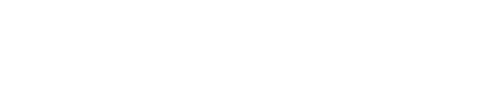
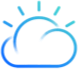

In [148]:
#Requesting url for the data
page = requests.get('https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c')
page.content

In [149]:
#Parsing the data
soup = BeautifulSoup(page.content,'html.parser')

In [150]:
#Creating empty lists
period = []
descr = []
temp = []
date_n_day = []

In [151]:
#Temperature
temps = soup.find_all('span',class_='DailyContent--temp--_8DL5')
for i in temps:
    temp.append(i.get_text())

In [152]:
#description
desc = soup.find_all('p',class_='DailyContent--narrative--3AcXd')
for i in desc:
    descr.append(i.get_text())

In [153]:
#period
perd = soup.find_all('h3',class_='DailyContent--daypartName--3G5Y8')
for i in perd:
    per = i.get_text()
    period.append(per[9:])

In [154]:
#date and day
dates = soup.find_all('span',class_='DailyContent--daypartDate--3MM0J')
for i in dates:
    date_n_day.append(i.get_text())

In [155]:
#Creating dataframe
df_weather = pd.DataFrame({})
df_weather['Dates'] = date_n_day
df_weather['Period'] = period
df_weather['Temperature'] = temp
df_weather['Description'] = descr

In [156]:
df_weather.set_index('Dates',inplace=True)
df_weather_final = df_weather[:16]
df_weather_final

,Period,Temperature,Description
Dates,,,
Mon 18,Night,52°,Partly to mostly cloudy and windy. Low 52F. Wi...
Tue 19,Day,63°,Windy with lots of sunshine. High 63F. Winds N...
Tue 19,Night,46°,Clear during the evening followed by mostly cl...
Wed 20,Day,63°,A mainly sunny sky. High 63F. Winds NNE at 5 t...
Wed 20,Night,43°,Clear skies early then becoming mostly cloudy ...
Thu 21,Day,57°,Partly cloudy skies. High 57F. Winds W at 5 to...
Thu 21,Night,47°,Partly cloudy during the evening. A few shower...
Fri 22,Day,53°,Intervals of clouds and sunshine. High 53F. Wi...
Fri 22,Night,43°,Cloudy with a few showers. Low 43F. Winds N at...


In [157]:
df_weather_final.to_csv('Question_8.csv')